## Final Model Report

*Report describing the final model to be delivered - typically comprised of one or more of the models built during the life of the project.*

## Analytic Approach

*   Definición del objetivo.

El objetivo de este proyecto fue **construir un modelo de Deep Learning para predecir de forma automática el diagnóstico de posibles patologías gastrointestinales y del colón a partir del análisis de imagenes de endoscopía**. Se consideraron cuatro (4) clases de diagnósticos: *0: Normal, 1: Ulcerative Colitis, 2: Polyps y 3: Esophagitis*. A continuación se presenta una imagen para cada muestra:

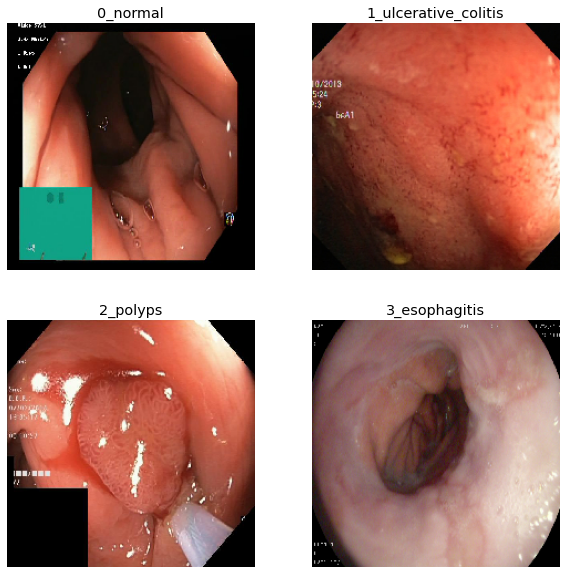






*   Cuales son las entradas? (Descripción)

Las entradas del modelo fueron imágenes de endoscopías del esofago y del colón de pacientes reales capturadas por por especialistas en gastroenterología endoscópica. Las imagenes se encuentran en formato .JPG con diferentes resoluciones que van desde los 459x459 hasta 1920x1920 píxeles. Se encuentran organizadas en carpetas nombradas de acuerdo con la patologia indicada antes. En total se tienen 4200 imágenes, distribuidas de la siguiente forma:

*   3200 para el *entrenamiento*. Separadas en 4 carpetas según la patología.
*   800 para la *prueba*. Separadas en 4 carpetas según la patología.
*   2000 para la *validación*. Separadas en 4 carpetas según la patología.



*   Que clase de modelo fue construido?

El modelo construido corresponde a una red neuronal convolucional derivada de un proceso de *Fine Tunning* tomando como base la red convolucional preentrenada de la ResNet50V2 para la extracción de características, en la cual se adicionaron cuatro (4) capas extras para el ejercicio de clasificación. A continuación se presenta la arquitectura de la misma.

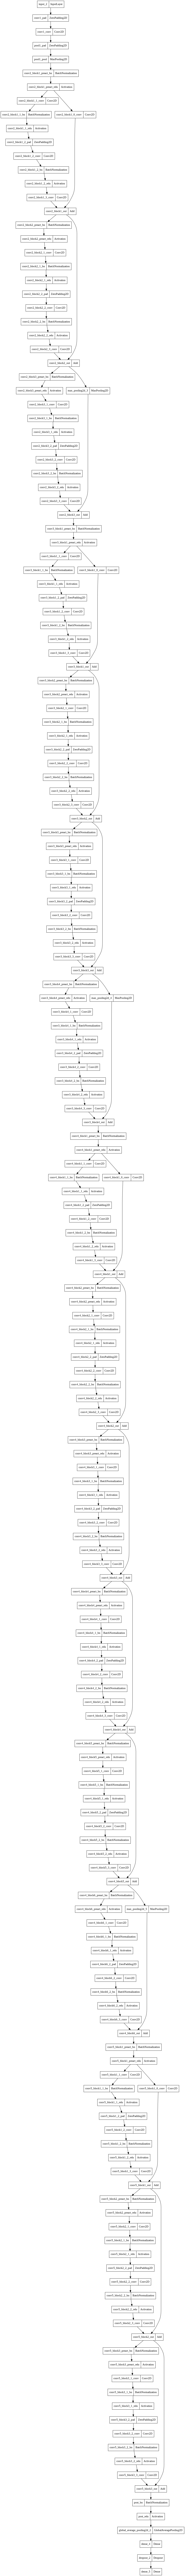

In [ ]:
# Agruegue aquí las librerías que necesite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses
# Extractor ResNet50V2
extractor = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False,input_shape=(224, 224, 3))

# Se adicionaron las siguientes capas para clasificación:

# Capa de global average pooling
pool = tf.keras.layers.GlobalAveragePooling2D()(extractor.output)
# Capa densa con 32 neuronas y activación relu
dense1 = tf.keras.layers.Dense(32, activation="relu")(pool)
# Capa de dropout con taza de 0.2 para regularización
drop1 = tf.keras.layers.Dropout(0.2)(dense1)
# Capa densa de salida con 4 clases
dense2 = tf.keras.layers.Dense(4, activation="softmax")(drop1)
# Mdelo de transfer learning
ft_model = tf.keras.models.Model(inputs=[extractor.input], outputs=[dense2])
keras.utils.plot_model(ft_model, 'my_first_model.png')

## Solution Description

*   Arquitectura de solución simple (fuentes de datos, componentes de solución, flujo de datos)


A continuación se presenta la arquitectura de la solución implementada integrando el flujo de los datos:

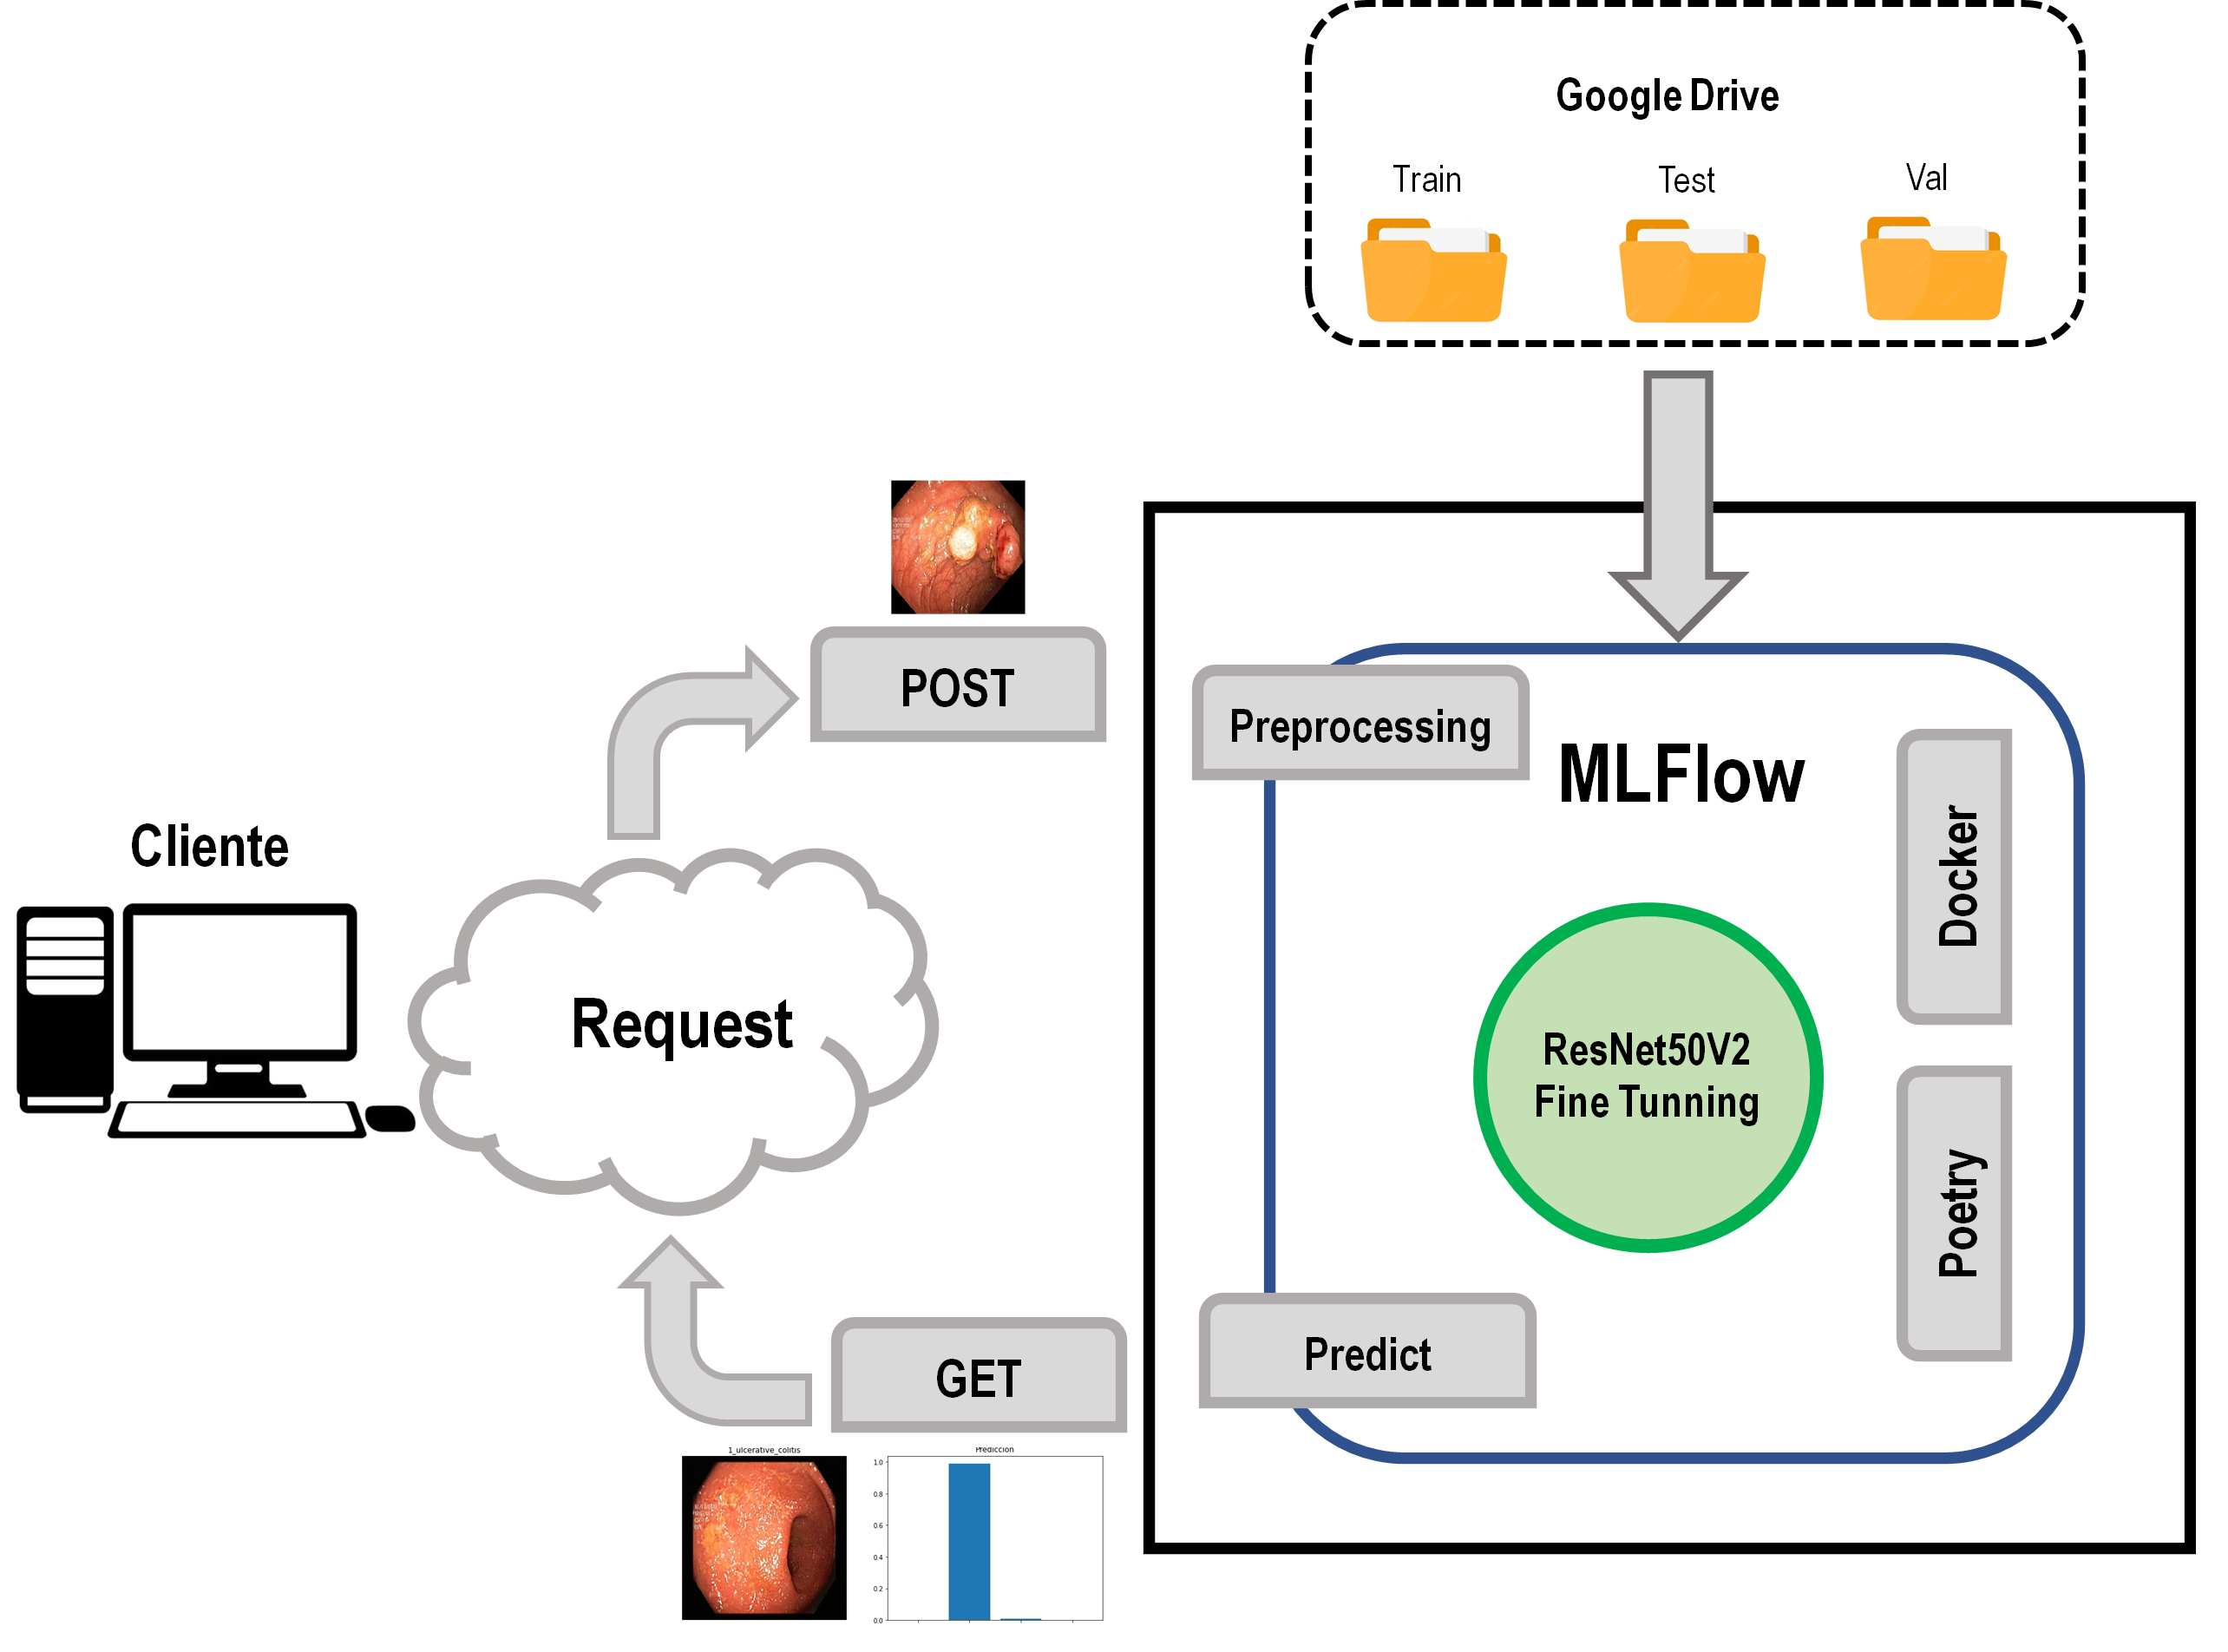

*   Cual es la salida?

La salida de la solución es el diagnóstico determinado por la probabilidad de pertenencia a alguna de las patologías presentadas anteriormente (*0: Normal, 1: Ulcerative Colitis, 2: Polyps y 3: Esophagitis*)dada la entrada de una endoscopía, como se presenta en la siguiente figura.

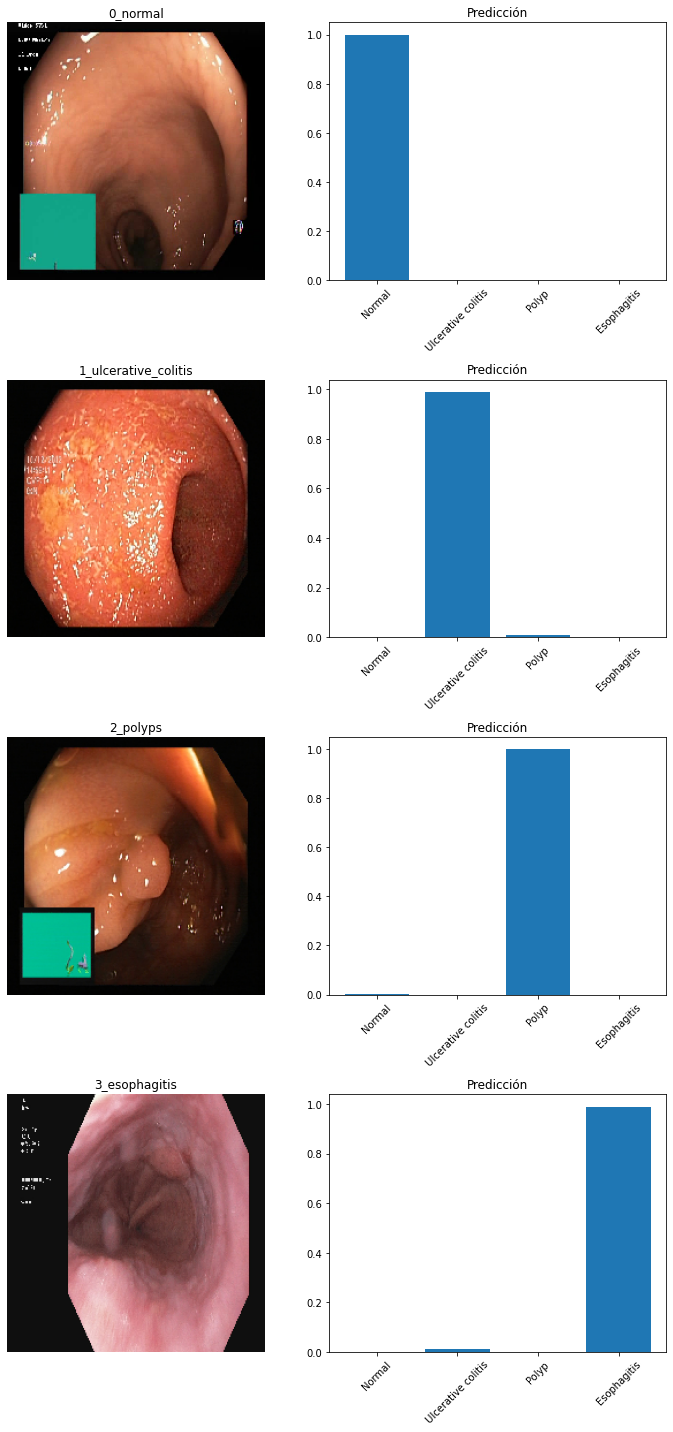

## Data

*   Fuente

La fuente de este proyecto fue el árticulo científico: "Kvasir: Un conjunto de datos de imágenes de varias clases para la detección de enfermedades gastrointestinales asistida por computadora" del enlace https://dl.acm.org/doi/pdf/10.1145/3083187.3083212. Este estudio fue encontrado en el sitio de Kaggle, https://www.kaggle.com/datasets/francismon/curated-colon-dataset-for-deep-learning/versions/1?resource=download, a partir del cual se realizó la obtención de los datos.



* Esquema de datos

A continuación se presenta el esquema de los datos.

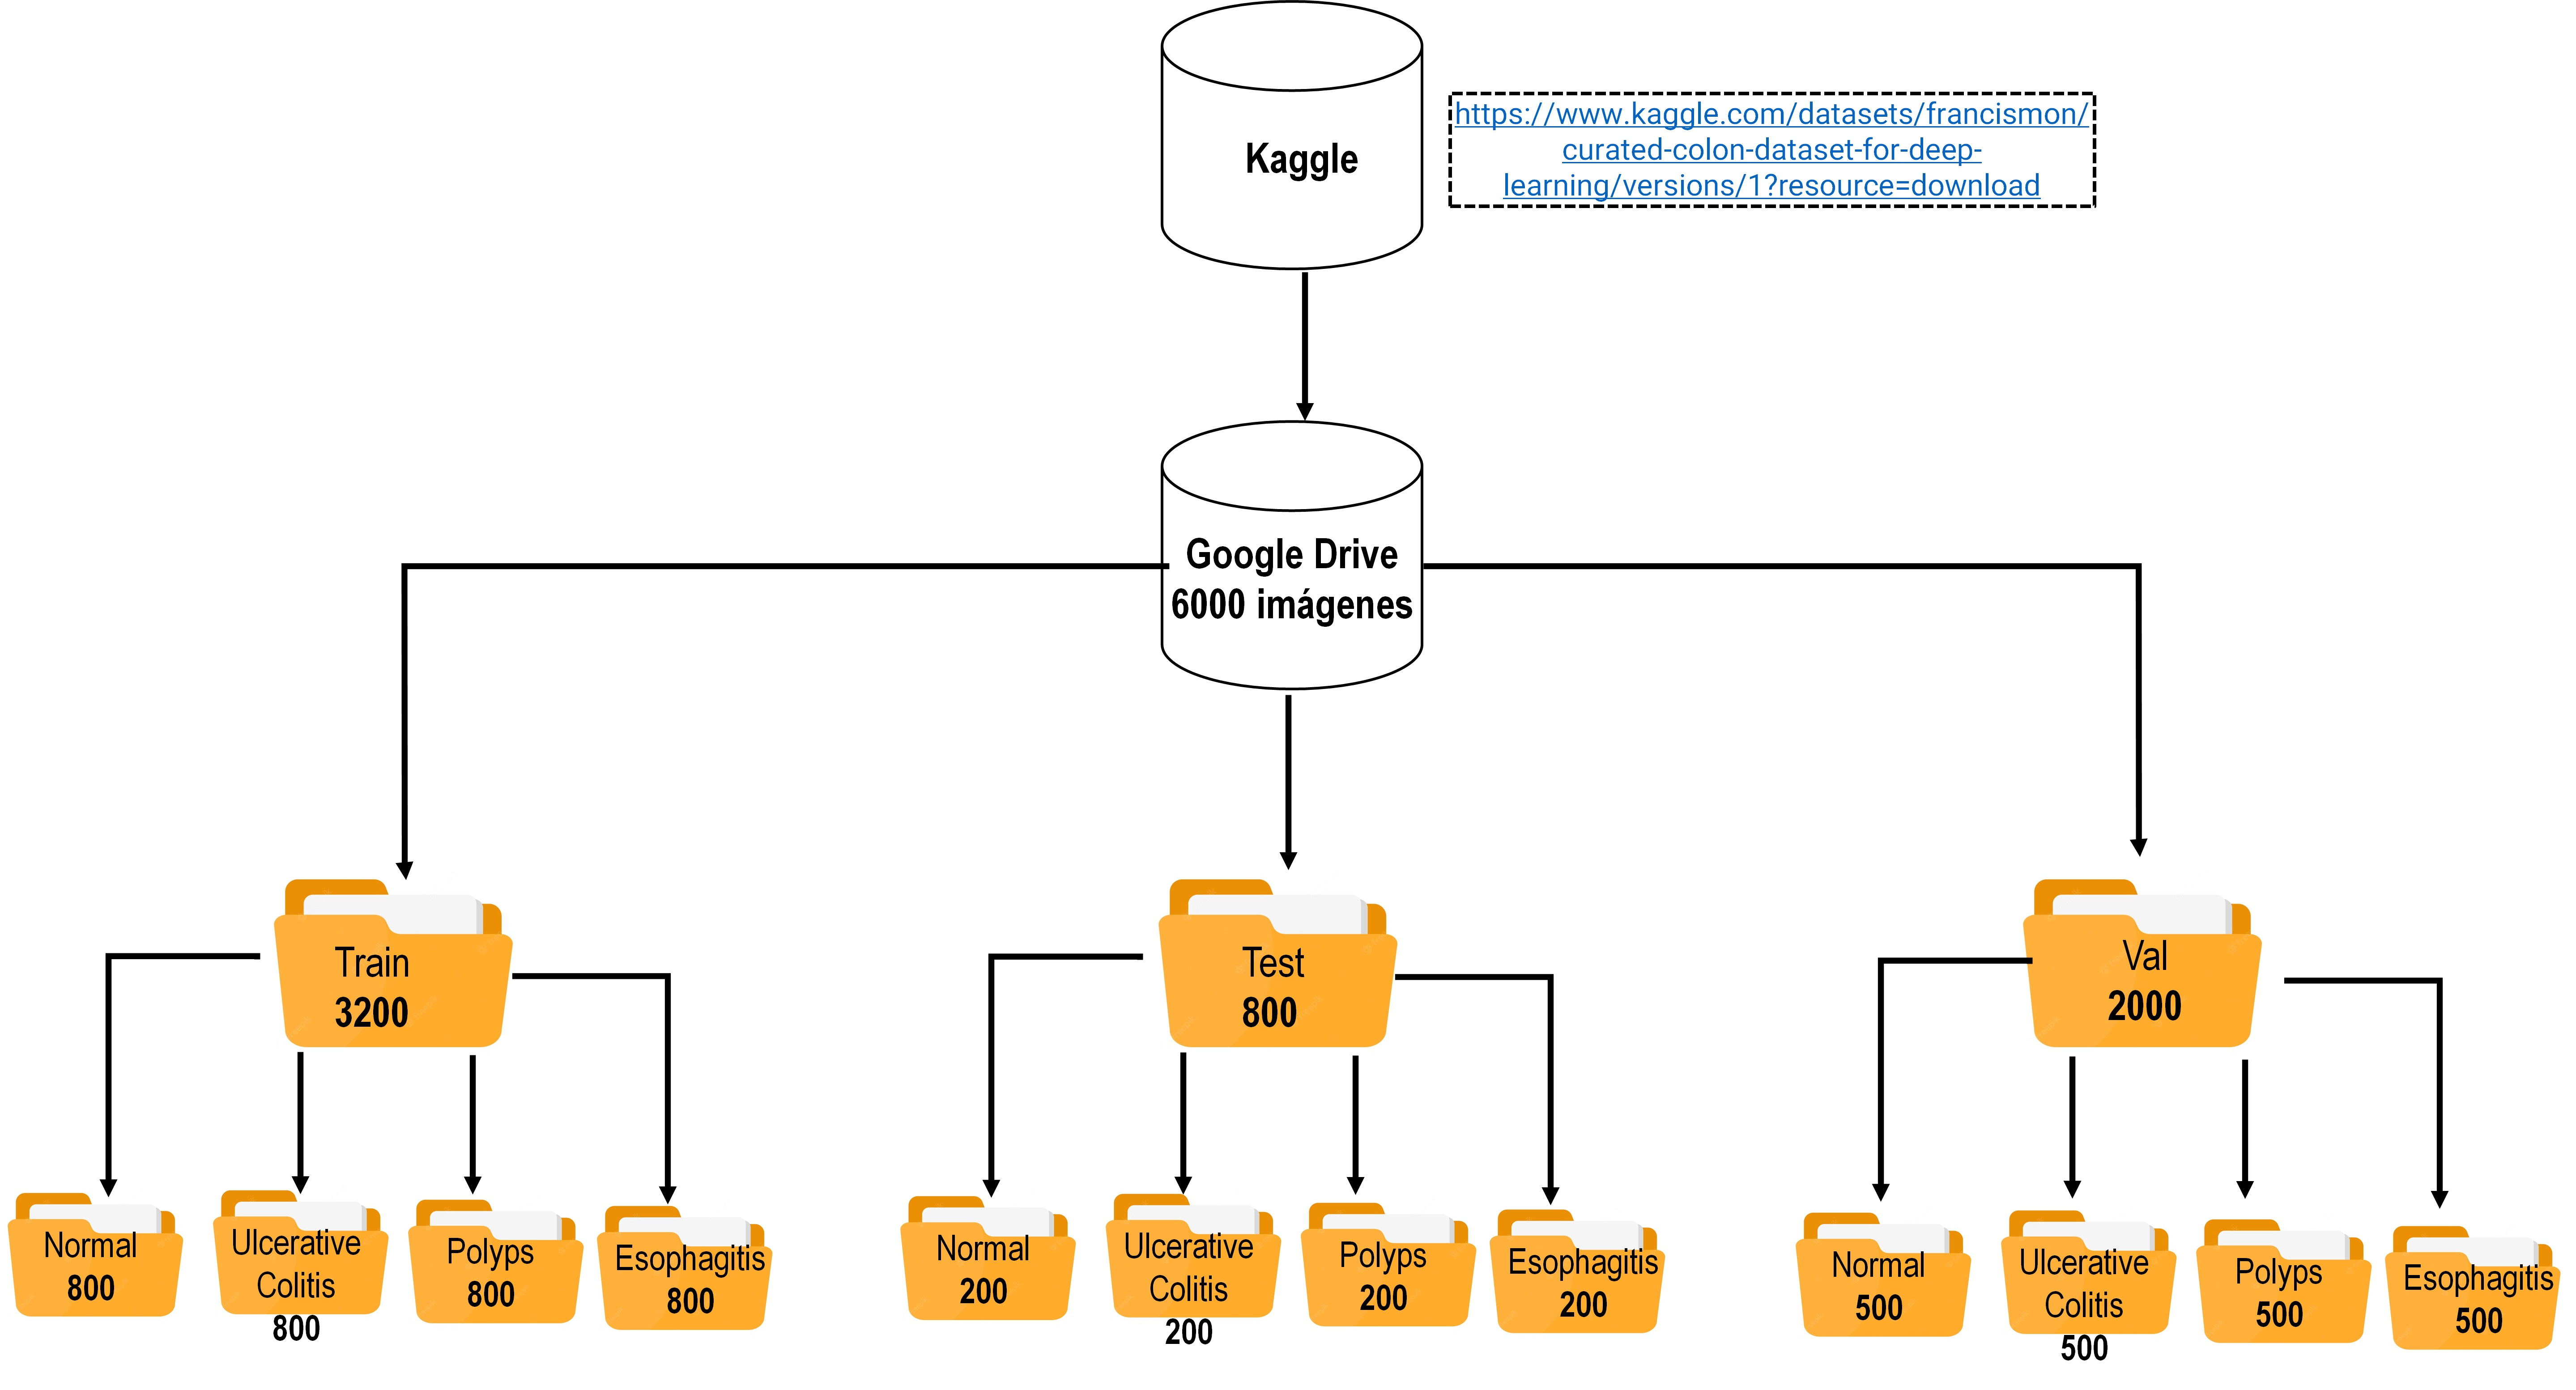

*   Muestreo

En el presente proyecto los datos provenientes desde la fuente provenian particionados en entrenamiento (*train*), prueba (*test*) y validación (*val*) equitativamente por cada clase, por lo que no fue necesario realizar un muestreo adicional a los mismos.

*   Estadísticas (recuentos)

En primera instancia se revisó si los datos se encontraban balanceados. Visualicemos la distribución de las clases en los datos.

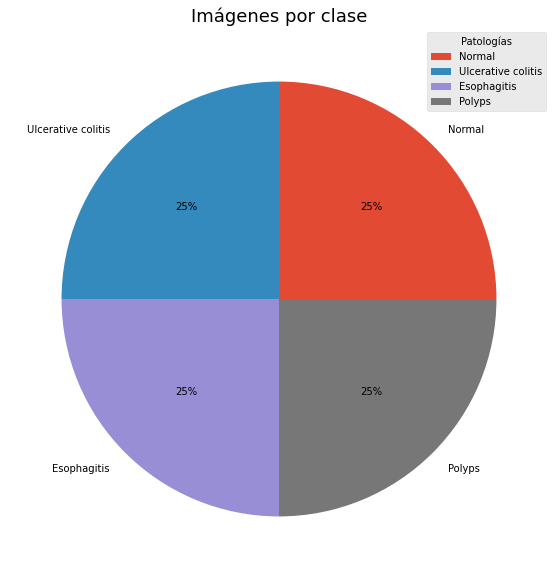

Así mismo, se revisó el número de imágenes de acuerdo al tamaño real discriminadas por clase mediante un histograma.

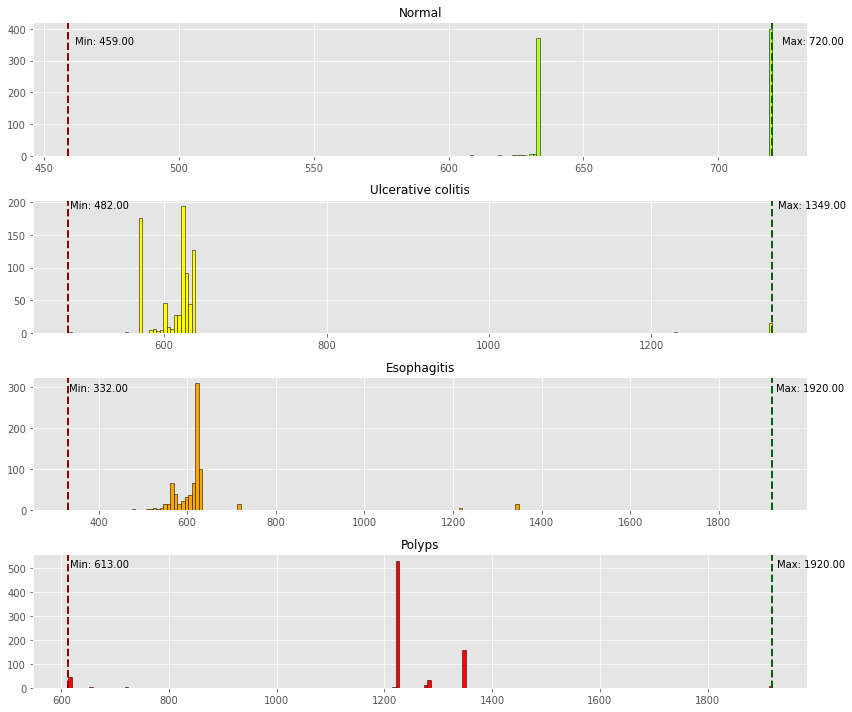

Finalmente, se revisó el porcentaje de imágenes de acuerdo al tamaño real discriminadas por clase.

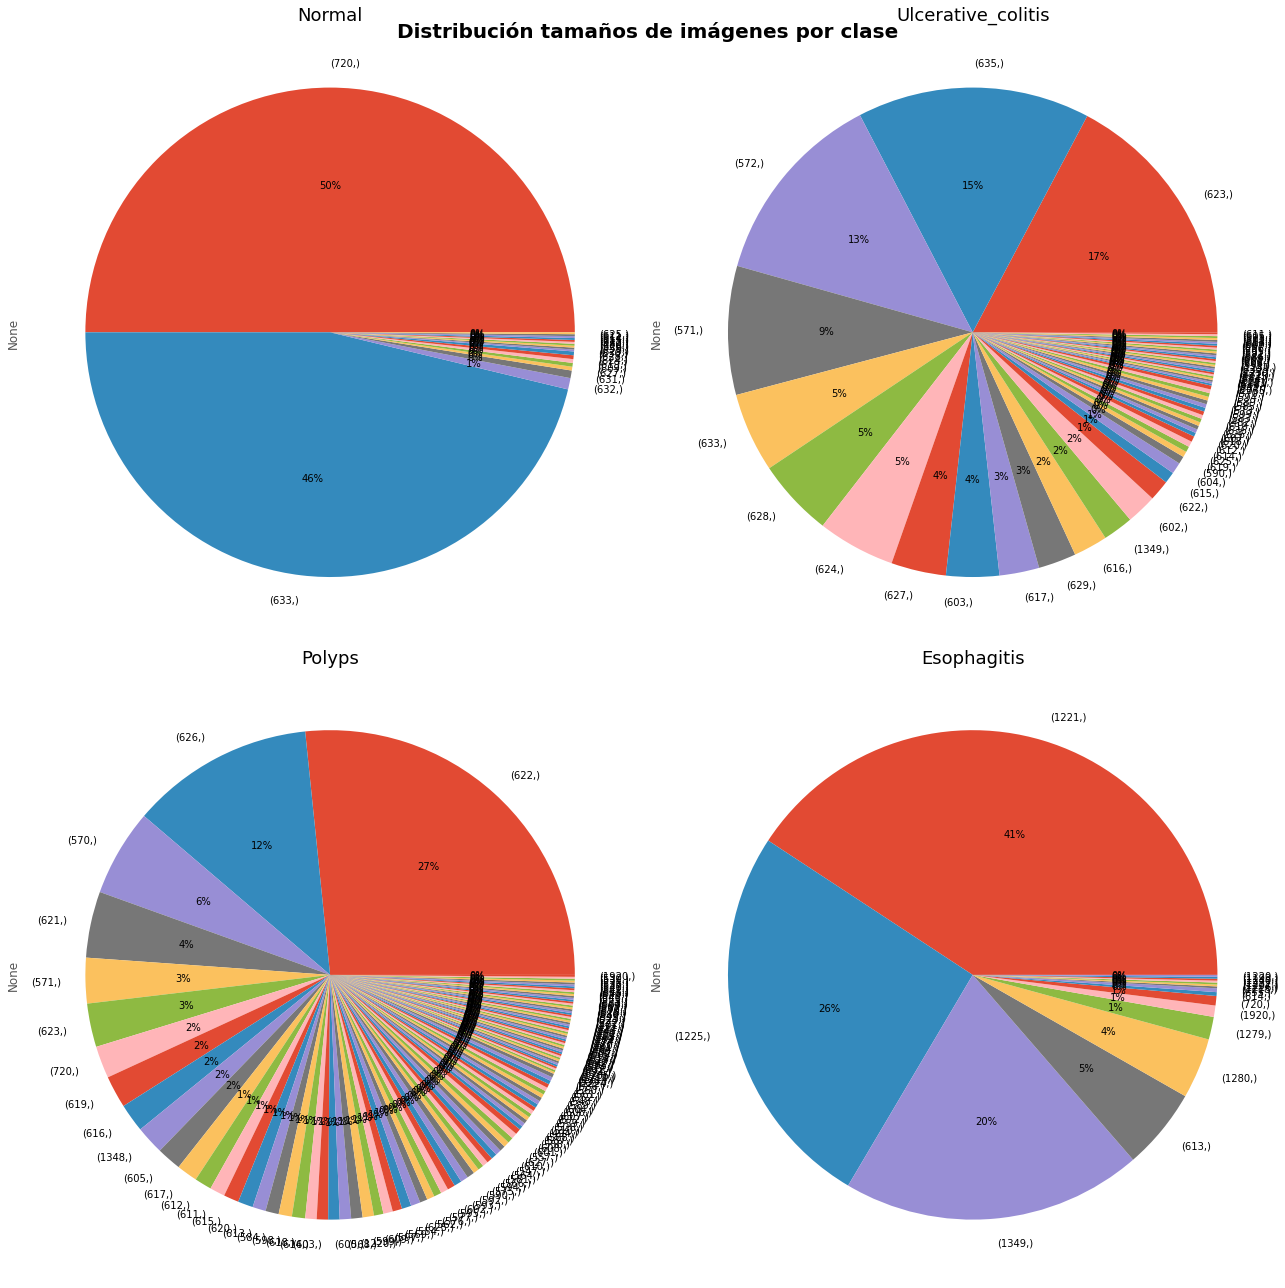



## Features

* De análisis exploratorio se revisó fue el promedio de la intensidad de los pixeles por cada clase mediante histogramas.

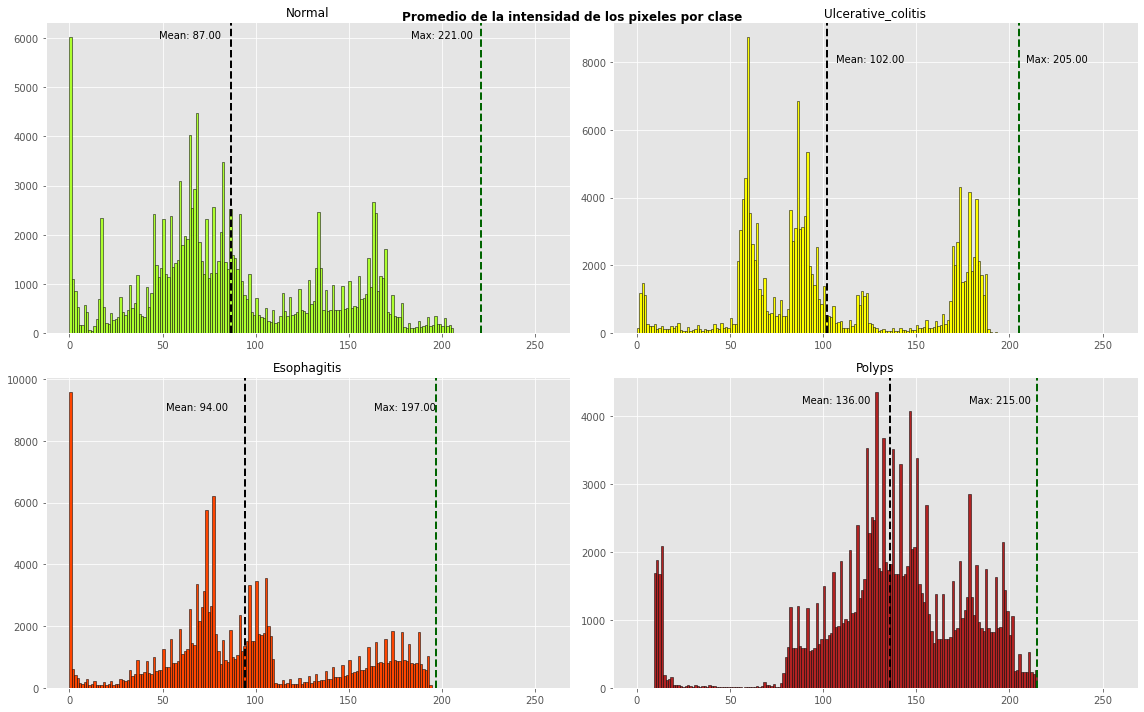

Los histogramas muestran la distribución de la intensidad de pixeles por cada clase, la media y el valor máximo. De acuerdo a las figuras se pudo apreciar que:

La patología normal a pesar de los valores que se concentran en el valor 0 (negro) la distribución se asemeja a una distribución normal.

La patología Ulcerative colitis parece presentar un patron de distribución normal en tres (3) intervalos [0,90],[91, 150] y [151,205].

La patología Esophagitis pareciera presentar una distribución similar a la Poisson ya que los valores se concentral en 0.

La patología Polypsl presenta una distribución que se asemeja a una distribución normal.

Finalmente, se revisaron los promedios de los valores de píxel por cada canal (R,G,B) por cada clase.

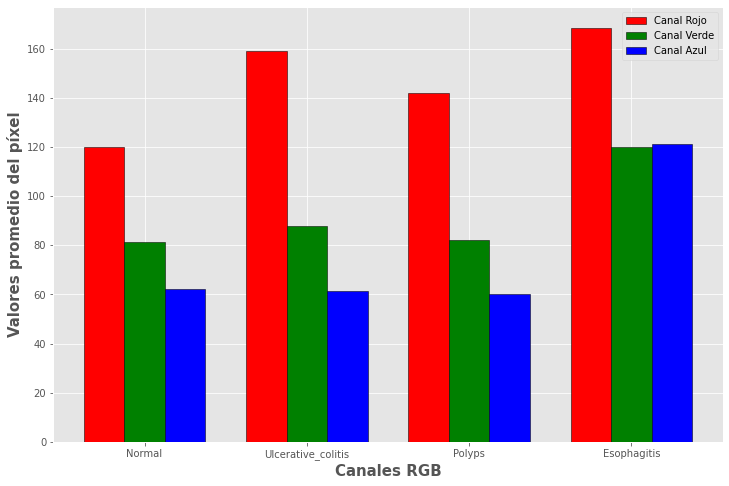

Encontrando que la patología Esophagitis presente el mayor promedio de valores en cada banda, mientras que el gráfico muestra que existe una similitud entre los valores promedio de las bandas verde y azul para las patologías Normal, Ulcerative colitis y Polyps.


## Algorithm

* Descripción o imágenes del gráfico de flujo de datos

El flujo de datos se presentó en el diagrama de la sección de *Solution Description*.

* ¿Qué aprendizaje(s) se utilizaron?

Se construyó un modelo de red neuronal convolucional pre-entrenada utilizando imagenes etiquetadas, lo que representa un **aprendizaje supervisado**.

* Hiperparámetros de aprendizaje.

Los hiperparámetros del modelo fueron cinco (5):

*    **Batch_size** = 32 De tipo float.
*    **Dropout** = 0.2 De tipo float.
*    **Epochs** =  20 De tipo int.
*    **Learning_rate** = 1e-3 calentamiento y 1e-4 entrenamiento De tipo float.
*    **Optimizer** = Adam.
*    **Loss** = Categorical_Crossentrophy.
*    **Metrics** = Accuracy.

## Results

*    Gráficas ROC/Lift, AUC, R^2, MAPE según corresponda
*    Gráficos de rendimiento para barridos de parámetros, si corresponde

El rendimiento de los modelos fue evaluado mediante las métricas de: exactitud (accuracy), recuperación (recall), precisión (precission) y Puntaje F1 (F1-Score). El mejor modelo correspondió al construido mediante la técnica de Fine Tunning, Los resultados muestran que la pérdida fue aproximadamente de 0.07 y 0.025 para el entrenamiento y la validación respectivamente. Por otra parte, la exactitud en el entrenamiento fue muy cercana a 1 para el entrenamiento y al 0.98 para la validación. Esto se puede apreciar en la siguiente figura.

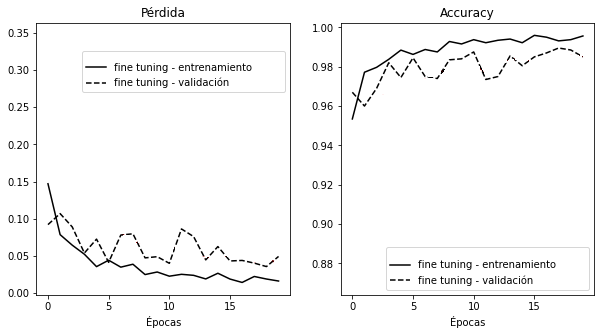

Por otra parte, en términos generales lLas métricas de precisión, recuperación y Puntuación F1 son muy cercanas al 1. Puntualmente, las clase 0: Normal y 3: Esophagitis obtuvieron un 100% en estas métricas.

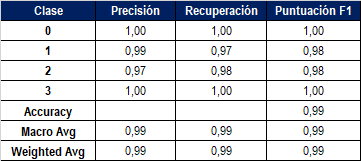